In [3]:
import numpy as np

In [2]:
def problem_1a (A, B):
    return A + B

In [3]:
def problem_1b (A, B, C):
    return (A * B) + np.transpose(C)

In [4]:
def problem_1c (x, y):
    return x.T.dot(y)

In [5]:
def problem_1d (A, j):
    return np.sum(A[0::2, j])

In [6]:
def problem_1e (A, c, d):
    return np.mean(A[np.nonzero((A >= c) & (A <=d ))])

In [7]:
def problem_1f (x, k, m, s):
    return np.random.randn(x + m, s * np.eye(x.shape[0]), k).T

In [8]:
def problem_1g (A):
    return A[:, np.random.permutation(A.shape[0])]

In [9]:
def problem_1h (x):
    return (x - np.mean(x)) / np.std(x)

In [10]:
def problem_1i (x, k):
    return np.repeat(np.atleast_2d(x), k, axis=0)

In [51]:
def problem_2a ():
    X = np.arange(9).reshape(3,3)
    print(X)
    print("\n")
    row_min = X.min(axis=1)
    print(row_min)
    print("\n")
    print(X-row_min)
    print("\n")

print("Part 2a:\n")
problem_2a()
print("This code is not subtracting each row's minimum element from the respective row because the line 'print(X - row_min)' isn't the correct way of implementing this solution.")
print("The code before this line adequetely creates the array X and obtains the minimum value in each row, but the array row_min is not used correctly.")
print("The result of 'X - row_min' is:\n")
print(X-row_min)
print("\nAnd this is because the statement is subtracting the row vector [0, 3, 6] from each row in X.")

Part 2a:

[[0 1 2]
 [3 4 5]
 [6 7 8]]


[0 3 6]


[[ 0 -2 -4]
 [ 3  1 -1]
 [ 6  4  2]]


This code is not subtracting each row's minimum element from the respective row because the line 'print(X - row_min)' isn't the correct way of implementing this solution.
The code before this line adequetely creates the array X and obtains the minimum value in each row, but the array row_min is not used correctly.
The result of 'X - row_min' is:

[[0 1 2]
 [0 1 2]
 [0 1 2]]

And this is because the statement is subtracting the row vector [0, 3, 6] from each row in X.


In [50]:
def problem_2b ():
    X = np.arange(9).reshape(3,3)
    row_min = X.min(axis=1)

    # Part b - change to correctly perform the computation with a 3d array
    Y = np.arange(27).reshape(3,3,3)
    print(Y)
    print("\n")
    # Expand for broadcasting
    # Broadcasting allows this new np array to be used in computations with arrays with different dimensions
    # The row_min array will now subtract 0 from first plane, 3 from second plane, and 6 from third plane of Y
    row_min = row_min[:, np.newaxis, np.newaxis]  
    print(Y-row_min)

print("Part 2b:\n")
problem_2b()
print("\nBroadcasting allows this new np array to be used in computations with arrays with different dimensions.")
print("The row_min array will now subtract 0 from first plane, 3 from second plane, and 6 from third plane of Y.")

Part 2b:

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]]]

Broadcasting allows this new np array to be used in computations with arrays with different dimensions.
The row_min array will now subtract 0 from first plane, 3 from second plane, and 6 from third plane of Y.


In [40]:
def linear_regression (X_tr, y_tr):
    X_t = X_tr.T
    Xdoty = np.matmul(X_t, y_tr)
    XdotXT = np.matmul(X_t, X_tr)
    return np.linalg.solve(XdotXT, Xdoty)

def train_age_regressor ():
    # Load data
    X_tr = np.reshape(np.load("age_regression_Xtr.npy"), (-1, 48*48))
    y_tr = np.load("age_regression_ytr.npy")
    X_te = np.reshape(np.load("age_regression_Xte.npy"), (-1, 48*48))
    y_te = np.load("age_regression_yte.npy")

    w = linear_regression(X_tr, y_tr)
    yhat_tr = np.matmul(X_tr, w)
    yhat_te = np.matmul(X_te, w)

    # Calculate MSE for training data
    trainDifference = np.square(yhat_tr - y_tr)
    trainMSE = np.mean(trainDifference)

    # Calculate MSE for testing data
    testDifference = np.square(yhat_te - y_te)
    testMSE = np.mean(testDifference)

    return trainMSE, testMSE

print("Part 3:\n")
print(train_age_regressor())

Part 3:

(80.83988427156137, 749.3051827446681)


Part 4a:



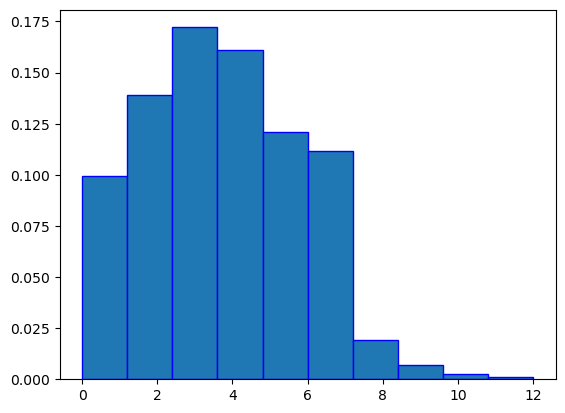

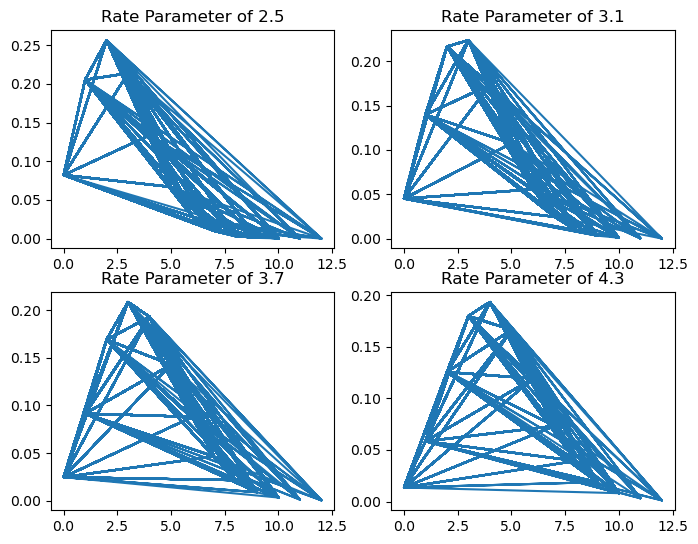

In [82]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

def poisson_distribution ():
    data = np.load('PoissonX.npy')
    plt.hist(data, density=True, edgecolor='blue')
    plt.show

    rateParameters = [2.5, 3.1, 3.7, 4.3]
    figure, axis = plt.subplots(2,2)

    Y = poisson.pmf(data,rateParameters[0])
    axis[0, 0].plot(data,Y)
    axis[0, 0].set_title("Rate Parameter of 2.5") 
    
    Y = poisson.pmf(data,rateParameters[1])
    axis[0, 1].plot(data,Y)
    axis[0, 1].set_title("Rate Parameter of 3.1") 
    
    Y = poisson.pmf(data,rateParameters[2]) 
    axis[1, 0].plot(data,Y)
    axis[1, 0].set_title("Rate Parameter of 3.7") 
    
    Y = poisson.pmf(data,rateParameters[3])
    axis[1, 1].plot(data,Y)
    axis[1, 1].set_title("Rate Parameter of 4.3")

    plt.subplots_adjust(bottom=0.1, right=1.1, top=1.1)
    plt.show

print("Part 4a:\n")
poisson_distribution()

In [83]:
print("Part 4b:\n")
print("I.")
print("It appears that the smaller magnitudes of x tend to correspond to the larger values of y.")
print("This can be seen in the first histogram where larger values of y match up with smaller values of x.")
print("The Poisson distribution graphs also show this with the highest y values corresponding to values of x between 2.5 and 5.0.\n")
print("II.")
print("It appears that the extreme larger and extreme lower magnitudes of x exhibit more uncertainty when it comes to predicting the value of y.")
print("This can be seen in the four histograms of the Poisson distribution where the y values are the lowest for the highest and lowest values of x.")


Part 4b:

I.
It appears that the smaller magnitudes of x tend to correspond to the larger values of y.
This can be seen in the first histogram where larger values of y match up with smaller values of x.
The Poisson distribution graphs also show this with the highest y values corresponding to values of x between 2.5 and 5.0.

II.
It appears that the extreme larger and extreme lower magnitudes of x exhibit more uncertainty when it comes to predicting the value of y.
This can be seen in the four histograms of the Poisson distribution where the y values are the lowest for the highest and lowest values of x.
